# Part II - (Ford GoBike System Data Presentation)
## by (Kariem AbuAisheh)

## Investigation Overview


This analysis explores the Ford GoBike bike-sharing dataset for February 2019. The goal is to identify patterns in trip duration, user demographics, and usage trends. We examine factors like user type, gender, age, and time of usage to uncover insights about commuting behavior and ridership distribution.

**Key Insights**
- Subscribers vs. Customers: Most users are Subscribers, who take shorter and more frequent trips, while Customers tend to take longer rides.
- Trip Duration Patterns: The majority of trips last under 16 minutes, with some extreme outliers indicating potential anomalies.
- Gender Distribution: The dataset is heavily skewed towards male riders, with female and "Other" gender categories making up a smaller portion.
- Peak Usage Hours: Usage spikes during morning (7-9 AM) and evening (4-7 PM) rush hours, aligning with typical work commute times.
- Age and Trip Duration: Younger riders (20-40 years) tend to take shorter, more frequent trips, while older riders show more variability in trip length.

## Dataset Overview and Executive Summary

The dataset consists of 183,412 trip records with 16 features, including:

- Trip Details: duration_sec, start_time, end_time.
- Station Information: start_station_name, end_station_name, start_station_latitude, start_station_longitude.
- User Information: user_type (Subscriber/Customer), member_birth_year, member_gender, bike_share_for_all_trip.
- Data Cleaning Steps:

    - Removed missing values in member_birth_year and member_gender.
    - Filtered unrealistic values for age (<10 or >90 years).
    - Capped trip durations at the 95th percentile to reduce the impact of outliers.

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

## (Visualization 1)

**Visualization 1: Trip Duration Distribution**
This histogram shows the distribution of trip durations, with values capped at the 95th percentile to remove outliers. The distribution is right-skewed, meaning most trips are short, typically under 20 minutes. The presence of a long tail suggests that a smaller number of trips last significantly longer. The kde (Kernel Density Estimation) curve helps visualize the overall trend of trip durations.

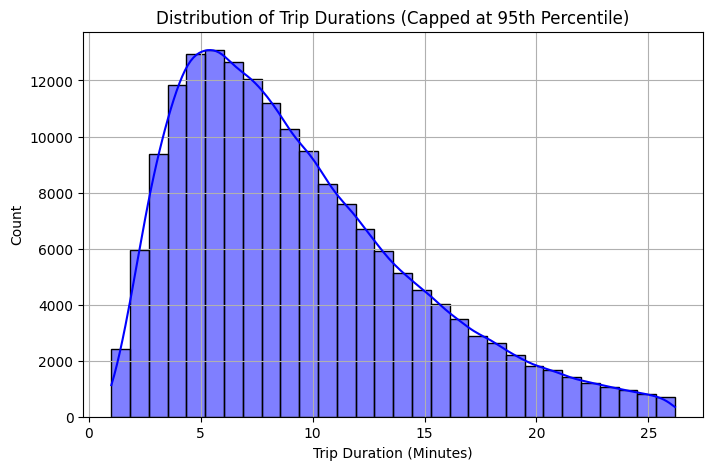

In [8]:
# Convert duration from seconds to minutes
df['duration_min'] = df['duration_sec'] / 60

# Define a cap for visualization (95th percentile)
cap_value = np.percentile(df['duration_min'], 95)

# Visualization 1: Trip Duration Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df[df['duration_min'] <= cap_value]['duration_min'], bins=30, kde=True, color='blue')

# Labels and title
plt.title('Distribution of Trip Durations (Capped at 95th Percentile)')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Count')
plt.grid(True)
plt.show()


## (Visualization 2)

**Visualization 2: Trip Duration by User Type**
This box plot compares trip durations between Subscribers and Customers. We can see that Customers tend to have longer trips, as indicated by their higher median duration and larger interquartile range (IQR). Subscribers, on the other hand, have shorter and more consistent trip durations. This trend makes sense, as Subscribers are likely commuters, while Customers may be tourists or occasional riders who take longer leisure trips.


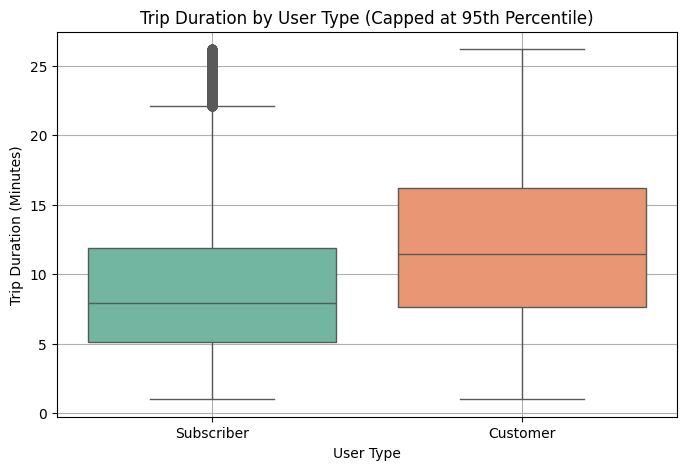

In [6]:
# Visualization 2: Trip Duration by User Type 
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df['duration_min'] <= cap_value], x='user_type', y='duration_min', palette="Set2")

# Labels and title
plt.title('Trip Duration by User Type (Capped at 95th Percentile)')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minutes)')
plt.grid(True)
plt.show()

## (Visualization 3)

**Visualization 3: Ride Counts by Hour of the Day**
This line plot illustrates the number of rides at each hour of the day. The trend reveals two distinct peaks—one in the morning (around 8 AM) and another in the evening (around 5-6 PM). This pattern aligns with typical commuting hours, suggesting that a large portion of bike share users rely on the service for daily commuting. There is a noticeable drop in rides during late-night hours.


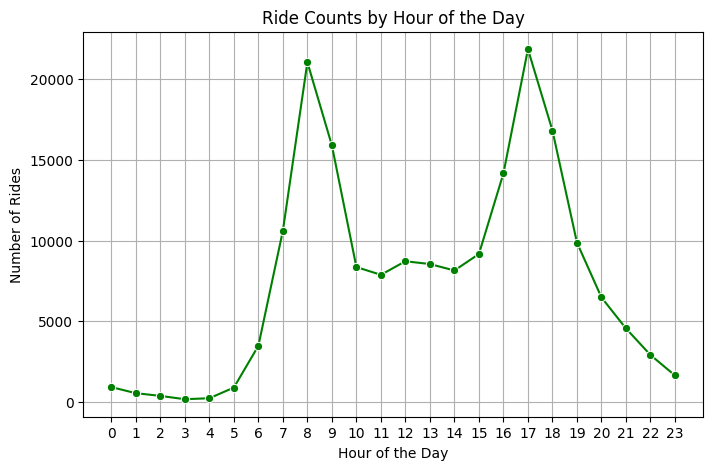

In [9]:
# Visualization 3: Ride Counts by Hour of the Day
df['start_time'] = pd.to_datetime(df['start_time'])
df['hour'] = df['start_time'].dt.hour

# Aggregate ride counts per hour
hourly_counts = df.groupby('hour').size()

plt.figure(figsize=(8, 5))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='green')

# Labels and title
plt.title('Ride Counts by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


In [ ]:
import shutil
shutil.make_archive('my_project', 'zip', '.')


